In [633]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

## Training Data Cleaning

In [634]:
training_data = pd.read_csv("0000000000002429_training_titanic_x_y_train.csv").copy()
training_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [635]:
training_data.shape

(668, 11)

In [636]:
training_data.describe(include="all")

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,668.000000,668,668,536.000000,668.000000,668.000000,668,668.000000,154,667,668.000000
unique,NaN,668,2,NaN,NaN,NaN,524,NaN,119,3,NaN
top,NaN,"Blackwell, Mr. Stephen Weart",male,NaN,NaN,NaN,3101295,NaN,G6,S,NaN
freq,NaN,1,427,NaN,NaN,NaN,6,NaN,4,484,NaN
mean,2.296407,NaN,NaN,29.700560,0.528443,0.407186,NaN,32.064552,NaN,NaN,0.402695
std,0.831638,NaN,NaN,14.240257,1.080327,0.854695,NaN,45.320835,NaN,NaN,0.490808
min,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,0.000000
50%,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.750000,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,38.250000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [637]:
percent_NaN = (training_data.isnull().sum()/training_data.shape[0])*100
print(percent_NaN)

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.760479
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       76.946108
Embarked     0.149701
Survived     0.000000
dtype: float64


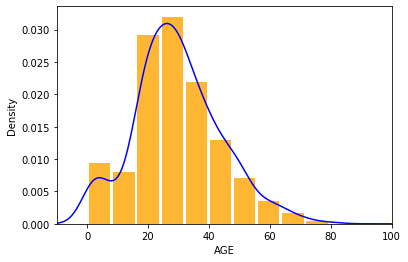

In [638]:
training_data["Age"].hist(bins=10, stacked=True,density=True,color="orange",alpha=0.8, width=7)
training_data["Age"].plot(kind='density', color='blue')
plt.xlim(-10,100)
plt.xlabel("AGE")
plt.show()

In [639]:
median = training_data["Age"].median(skipna=True)
training_data["Age"].fillna(median,inplace=True)

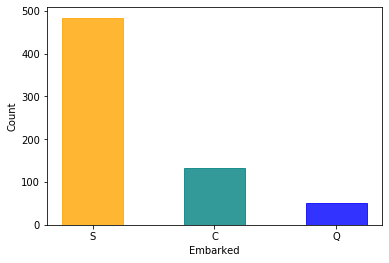

In [640]:
embarked_value = training_data["Embarked"].value_counts().index
embarked_count = training_data["Embarked"].value_counts().values

barlist = plt.bar(embarked_value,embarked_count,width=0.5,alpha=0.8)
barlist[0].set_color('orange')
barlist[1].set_color('teal')
barlist[2].set_color('blue')
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [641]:
training_data["Embarked"].fillna("S",inplace=True)

In [642]:
training_data["Embarked_S"]=training_data["Embarked"]=="S"
training_data["Embarked_C"]=training_data["Embarked"]=="C"
training_data["Embarked_Q"]=training_data["Embarked"]=="Q"

training_data.loc[training_data["Embarked_S"]==True,"Embarked_S"] = 1
training_data.loc[training_data["Embarked_S"]==False,"Embarked_S"] = 0

training_data.loc[training_data["Embarked_C"]==True,"Embarked_C"] = 1
training_data.loc[training_data["Embarked_C"]==False,"Embarked_C"] = 0

training_data.loc[training_data["Embarked_Q"]==True,"Embarked_Q"] = 1
training_data.loc[training_data["Embarked_Q"]==False,"Embarked_Q"] = 0
training_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Embarked_S,Embarked_C,Embarked_Q
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1,1,0,0
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.0,0,0,A/5 2466,8.050,NaN,S,0,1,0,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0,1,0,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0,1,0,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0,1,0,0


In [643]:
training_data.loc[training_data["Sex"]=="male","Sex"] = 1
training_data.loc[training_data["Sex"]=="female","Sex"] = 0

In [644]:
title_training=[]
for i in training_data['Name']:
    title_training.append(i.split(',')[1].split('.')[0].strip())
title_training=np.array(title_training)
title_training[title_training=='Master']=0
title_training[title_training=='Miss']=1
title_training[title_training=='Mr']=2
title_training[title_training=='Mrs']=3
title_training[(title_training!='0')&(title_training!='1')&(title_training!='2')&(title_training!='3')]=4
title_training=np.array(title_training, dtype='int')

In [645]:
training_data.drop("Name",axis=1,inplace=True)
training_data.drop("Cabin",axis=1,inplace=True)
training_data.drop("Ticket",axis=1,inplace=True)
training_data.drop("Embarked",axis=1,inplace=True)

In [646]:
training_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_S,Embarked_C,Embarked_Q
0,2,0,29.0,1,0,26.000,1,1,0,0
1,3,1,29.0,0,0,8.050,0,1,0,0
2,2,1,39.0,0,0,26.000,0,1,0,0
3,3,0,29.0,0,4,21.075,0,1,0,0
4,3,1,25.0,0,0,7.050,0,1,0,0


In [647]:
training_data["Is_Minor"]=training_data["Age"]<18
training_data.loc[training_data["Is_Minor"]==True,"Is_Minor"] = 1
training_data.loc[training_data["Is_Minor"]==False,"Is_Minor"] = 0
training_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_S,Embarked_C,Embarked_Q,Is_Minor
0,2,0,29.0,1,0,26.000,1,1,0,0,0
1,3,1,29.0,0,0,8.050,0,1,0,0,0
2,2,1,39.0,0,0,26.000,0,1,0,0,0
3,3,0,29.0,0,4,21.075,0,1,0,0,0
4,3,1,25.0,0,0,7.050,0,1,0,0,0


In [648]:
training_data["Survived_"]=training_data["Survived"]
training_data.drop("Survived",axis=1,inplace=True)

In [649]:
training_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Is_Minor,Survived_
0,2,0,29.0,1,0,26.000,1,0,0,0,1
1,3,1,29.0,0,0,8.050,1,0,0,0,0
2,2,1,39.0,0,0,26.000,1,0,0,0,0
3,3,0,29.0,0,4,21.075,1,0,0,0,0
4,3,1,25.0,0,0,7.050,1,0,0,0,0


In [650]:
X_train = training_data.values[:,:-1]
X_train=np.append(X_train, title_training.reshape(-1, 1), axis=1)
Y_train = training_data.values[:,-1]

In [651]:
square = []
for i in X_train:
    square.append(i**2)
square = np.array(square)
X_train = np.append(X_train, square, axis = 1)

In [652]:
travel = []
travel.append(np.where((training_data["SibSp"]+training_data["Parch"])>0, 0, 1))

travel = np.array(travel)
X_train = np.append(X_train, travel.reshape(-1,1), axis = 1)

In [653]:
age_fare = []
for i in training_data["Age"]*training_data["Fare"]:
    age_fare.append(i)
age_fare = np.array(age_fare)
X_train = np.append(X_train, age_fare.reshape(-1,1), axis = 1)

In [654]:
age_add_fare = []
for i in training_data["Age"]+training_data["Fare"]:
    age_add_fare.append(i)
age_add_fare = np.array(age_add_fare)
X_train = np.append(X_train, age_add_fare.reshape(-1,1), axis = 1)

In [655]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [656]:
print(X_train.shape,Y_train.shape)

(668, 25) (668,)


## Testing Data Cleaning

In [657]:
testing_data = pd.read_csv("0000000000002429_test_titanic_x_test.csv").copy()
testing_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [658]:
testing_data.shape

(223, 10)

In [659]:
testing_data.describe(include="all")

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,223.000000,223,223,178.000000,223.000000,223.000000,223,223.000000,50,222
unique,NaN,223,2,NaN,NaN,NaN,212,NaN,49,3
top,NaN,"Leader, Dr. Alice (Farnham)",male,NaN,NaN,NaN,CA 2144,NaN,B58 B60,S
freq,NaN,1,150,NaN,NaN,NaN,3,NaN,2,160
mean,2.345291,NaN,NaN,29.694775,0.506726,0.304933,NaN,32.622551,NaN,NaN
std,0.850047,NaN,NaN,15.398053,1.169700,0.634108,NaN,61.062047,NaN,NaN
min,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2.000000,NaN,NaN,19.250000,0.000000,0.000000,NaN,7.879200,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,12.475000,NaN,NaN
75%,3.000000,NaN,NaN,37.750000,1.000000,0.000000,NaN,30.035400,NaN,NaN


In [660]:
percent_NaN = (testing_data.isnull().sum()/testing_data.shape[0])*100
print(percent_NaN)

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.179372
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.578475
Embarked     0.448430
dtype: float64


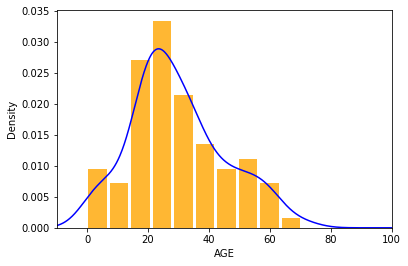

In [661]:
testing_data["Age"].hist(bins=10, stacked=True,density=True,color="orange",alpha=0.8, width=6)
testing_data["Age"].plot(kind='density', color='blue')
plt.xlim(-10,100)
plt.xlabel("AGE")
plt.show()

In [662]:
median = testing_data["Age"].median(skipna=True)
testing_data["Age"].fillna(median,inplace=True)

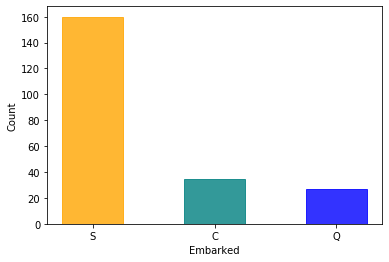

In [663]:
embarked_value = testing_data["Embarked"].value_counts().index
embarked_count = testing_data["Embarked"].value_counts().values

barlist = plt.bar(embarked_value,embarked_count,width=0.5,alpha=0.8)
barlist[0].set_color('orange')
barlist[1].set_color('teal')
barlist[2].set_color('blue')
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [664]:
testing_data["Embarked"].fillna("S",inplace=True)

In [665]:
testing_data["Embarked_S"]=testing_data["Embarked"]=="S"
testing_data["Embarked_C"]=testing_data["Embarked"]=="C"
testing_data["Embarked_Q"]=testing_data["Embarked"]=="Q"

testing_data.loc[testing_data["Embarked_S"]==True,"Embarked_S"] = 1
testing_data.loc[testing_data["Embarked_S"]==False,"Embarked_S"] = 0

testing_data.loc[testing_data["Embarked_C"]==True,"Embarked_C"] = 1
testing_data.loc[testing_data["Embarked_C"]==False,"Embarked_C"] = 0

testing_data.loc[testing_data["Embarked_Q"]==True,"Embarked_Q"] = 1
testing_data.loc[testing_data["Embarked_Q"]==False,"Embarked_Q"] = 0
testing_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,1,0,0
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,0,0
2,3,"Kilgannon, Mr. Thomas J",male,27.0,0,0,36865,7.7375,NaN,Q,0,0,1
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,1,0,0
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,1,0,0


In [666]:
testing_data.loc[testing_data["Sex"]=="male","Sex"] = 1
testing_data.loc[testing_data["Sex"]=="female","Sex"] = 0

In [667]:
title_testing=[]
for i in testing_data['Name']:
    title_testing.append(i.split(',')[1].split('.')[0].strip())
title_testing=np.array(title_testing)
title_testing[title_testing=='Master']=0
title_testing[title_testing=='Miss']=1
title_testing[title_testing=='Mr']=2
title_testing[title_testing=='Mrs']=3
title_testing[(title_testing!='0')&(title_testing!='1')&(title_testing!='2')&(title_testing!='3')]=4
title_testing=np.array(title_testing, dtype='int')

In [668]:
testing_data.drop("Name",axis=1,inplace=True)
testing_data.drop("Cabin",axis=1,inplace=True)
testing_data.drop("Embarked",axis=1,inplace=True)
testing_data.drop("Ticket",axis=1,inplace=True)

In [669]:
testing_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,2,1,8.0,1,1,36.7500,1,0,0
1,1,0,49.0,0,0,25.9292,1,0,0
2,3,1,27.0,0,0,7.7375,0,0,1
3,2,0,24.0,2,1,27.0000,1,0,0
4,1,1,36.0,0,0,26.2875,1,0,0


In [670]:
testing_data["Is_Minor"]=testing_data["Age"]<18
testing_data.loc[testing_data["Is_Minor"]==True,"Is_Minor"] = 1
testing_data.loc[testing_data["Is_Minor"]==False,"Is_Minor"] = 0
testing_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Is_Minor
0,2,1,8.0,1,1,36.7500,1,0,0,1
1,1,0,49.0,0,0,25.9292,1,0,0,0
2,3,1,27.0,0,0,7.7375,0,0,1,0
3,2,0,24.0,2,1,27.0000,1,0,0,0
4,1,1,36.0,0,0,26.2875,1,0,0,0


In [671]:
X_test = testing_data.values
X_test=np.append(X_test, title_testing.reshape(-1, 1), axis=1)
square = []
for i in X_test:
    square.append(i**2)
square = np.array(square)
X_test = np.append(X_test, square, axis = 1)

In [672]:
travel = []
travel.append(np.where((testing_data["SibSp"]+testing_data["Parch"])>0, 0, 1))

travel = np.array(travel)
X_test = np.append(X_test, travel.reshape(-1,1), axis = 1)

In [673]:
age_fare = []
for i in testing_data["Age"]*testing_data["Fare"]:
    age_fare.append(i)
age_fare = np.array(age_fare)
X_test = np.append(X_test, age_fare.reshape(-1,1), axis = 1)

In [674]:
age_add_fare = []
for i in testing_data["Age"]+testing_data["Fare"]:
    age_add_fare.append(i)
age_add_fare = np.array(age_add_fare)
X_test = np.append(X_test, age_add_fare.reshape(-1,1), axis = 1)

In [675]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Logistic Regression

In [676]:
clf=LogisticRegression(C=2,solver="saga",max_iter=10000000,tol=0.00001)

In [677]:
clf.fit(X_train, Y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=1e-05, verbose=0,
                   warm_start=False)

In [678]:
clf.score(X_train, Y_train)

0.8233532934131736

In [679]:
Y_pred=clf.predict(X_test)

In [680]:
np.savetxt("predictions.csv", Y_pred,fmt="%.5f", delimiter=",")